In [6]:
import pandas as pd

# Load the dataset
file_path = 'Resources/Diabetes_Data.csv' 
df = pd.read_csv('Resources/Diabetes_Data.csv')

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz
import matplotlib.pyplot as plt
import numpy as np


# Handle missing values
df.fillna(df.median(), inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

# Ensure the target variable is integer
df['Diabetes_binary'] = df['Diabetes_binary'].astype(int)

# Define features and target variable
X = df[['HighBP', 'GenHlth', 'Education', 'Income',]]
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8615381583096815
Confusion Matrix:
[[43588   151]
 [ 6874   123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.45      0.02      0.03      6997

    accuracy                           0.86     50736
   macro avg       0.66      0.51      0.48     50736
weighted avg       0.81      0.86      0.80     50736



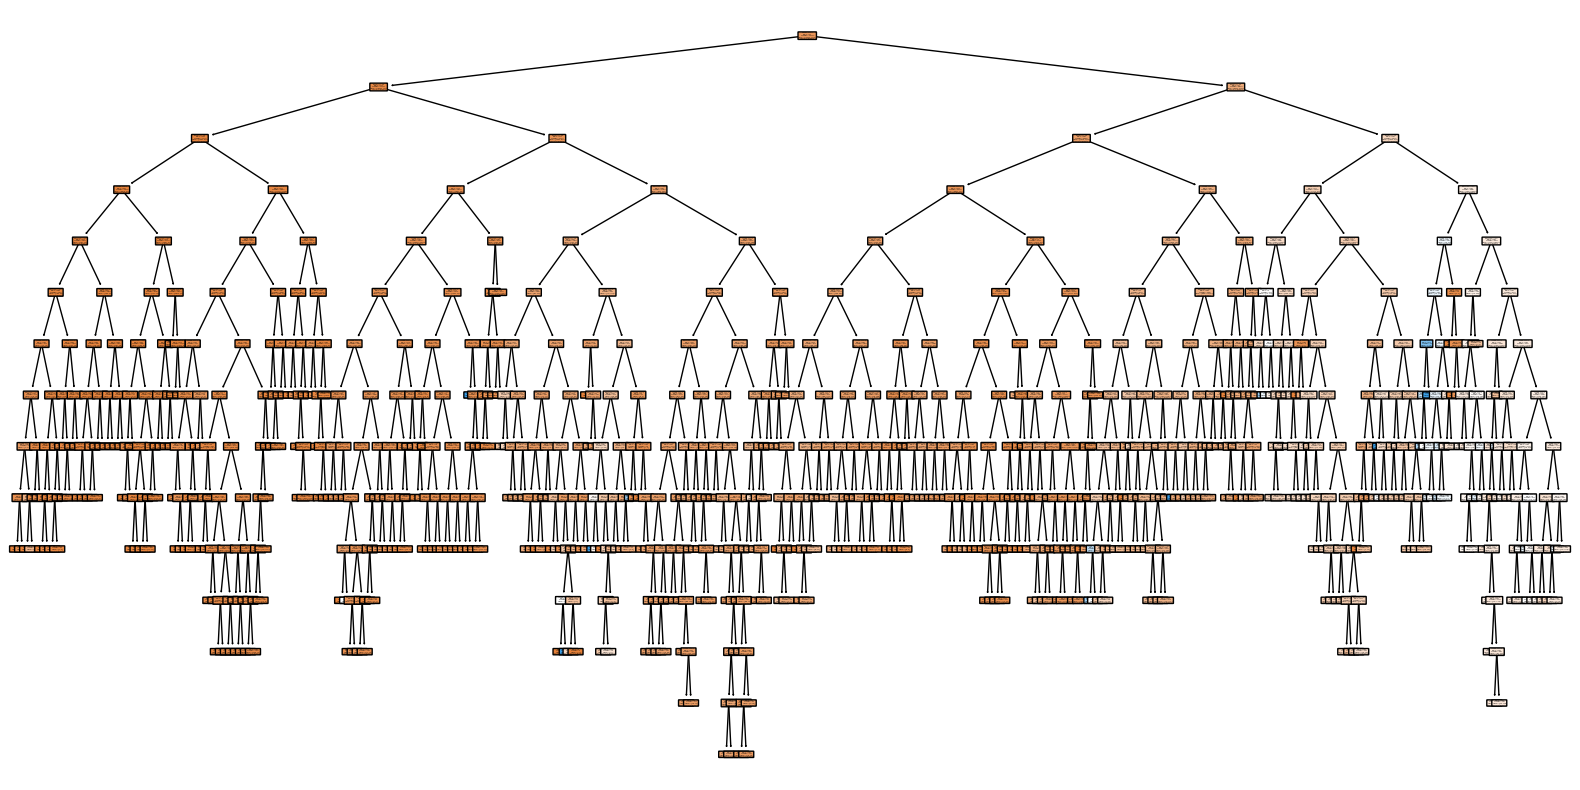

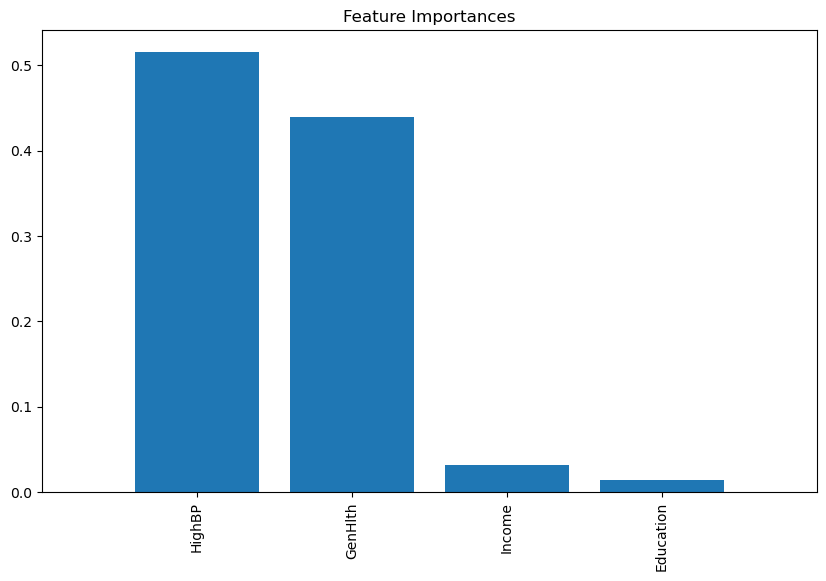

In [10]:
# Visualize the decision tree with graphviz
dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Diabetes', 'Diabetes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # This saves the tree as a PDF file
graph.view()  # This opens the PDF file

# Plot the decision tree using plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()

# Plot feature importances
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
# Try Grid Search Method